# Drawing Conclusions
Use the space below to address questions on datasets `clean_08.csv` and `clean_18.csv`. You should've created these data files in the previous section: *Fixing Data Types Pt 3*.

In [2]:
# load datasets
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df_08 = pd.read_csv('clean_08.csv')
df_18 = pd.read_csv('clean_18.csv')
df_08.insert(0,'year','2008')
df_18.insert(0, 'year', '2018')
all_data = df_08.append(df_18)
all_data.tail()

,year,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
827,2018,TOYOTA Sequoia FFV,5.7,8,SemiAuto-6,4WD,Gas,standard SUV,5.0,13.0,17.0,14.0,1,No
828,2018,TOYOTA Tundra FFV,5.7,8,SemiAuto-6,4WD,Gas,pickup,5.0,13.0,17.0,15.0,2,No
829,2018,VOLVO S90,2.0,4,SemiAuto-8,4WD,Electricity,midsize car,7.0,70.0,72.0,71.0,10,Elite
830,2018,VOLVO XC 60,2.0,4,SemiAuto-8,4WD,Electricity,small SUV,7.0,60.0,58.0,59.0,10,Elite
831,2018,VOLVO XC 90,2.0,4,SemiAuto-8,4WD,Electricity,standard SUV,7.0,63.0,61.0,62.0,10,Elite


### Q1: Are more unique models using alternative sources of fuel? By how much?

In [3]:
alt_fuel08 = df_08.query("fuel != 'Gasoline' and fuel != 'gas'")
alt_fuel18 = df_18.query("fuel != 'Gasoline' and fuel != 'gas'")
uniq08 = alt_fuel08['model'].nunique()
uniq18 = alt_fuel18['model'].nunique()


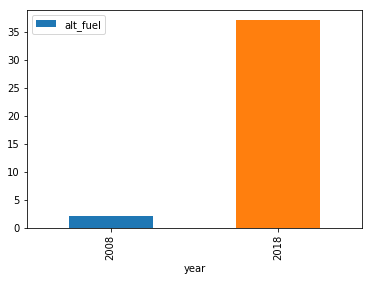

In [4]:
all_alt = pd.DataFrame({'year':['2008','2018'], 'alt_fuel':[uniq08,uniq18]})
all_alt.plot(kind='bar', x="year", y='alt_fuel')

### Q2: How much have vehicle classes improved in fuel economy?  

In [5]:
dropsp = all_data.drop(all_data[all_data.veh_class == 'special purpose'].index)


In [6]:
dropvan = dropsp.drop(dropsp[dropsp.veh_class == 'van'].index)

In [7]:
dropvan['veh_class'].replace(['small SUV','standard SUV'],'SUV',inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [8]:
clean_class = dropvan
clean_class.groupby('veh_class').count()

,year,model,displ,cyl,trans,drive,fuel,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
veh_class,,,,,,,,,,,,,
SUV,462,462,462,462,462,462,462,462,462,462,462,462,462
large car,143,143,143,143,143,143,143,143,143,143,143,143,143
midsize car,273,273,273,273,273,273,273,273,273,273,273,273,273
minivan,22,22,22,22,22,22,22,22,22,22,22,22,22
pickup,154,154,154,154,154,154,154,154,154,154,154,154,154
small car,613,613,613,613,613,613,613,613,613,613,613,613,613
station wagon,94,94,94,94,94,94,94,94,94,94,94,94,94


In [9]:
class_counts = clean_class.groupby(['year','veh_class']).count()['cmb_mpg']
class_counts

year  veh_class    
2008  SUV              275
      large car         55
      midsize car      137
      minivan           17
      pickup            83
      small car        331
      station wagon     60
2018  SUV              187
      large car         88
      midsize car      136
      minivan            5
      pickup            71
      small car        282
      station wagon     34
Name: cmb_mpg, dtype: int64

In [10]:
means= clean_class.groupby(['year','veh_class']).mean()['cmb_mpg']
means

year  veh_class    
2008  SUV              18.436364
      large car        18.509091
      midsize car      21.562044
      minivan          19.117647
      pickup           16.277108
      small car        21.117825
      station wagon    22.366667
2018  SUV              21.443850
      large car        23.409091
      midsize car      27.808824
      minivan          20.800000
      pickup           18.661972
      small car        25.503546
      station wagon    27.529412
Name: cmb_mpg, dtype: float64

In [11]:

proportions08 = means['2008']
proportions18 = means['2018']
print(f"08= {proportions08} 18 = {proportions18}")

08= veh_class
SUV              18.436364
large car        18.509091
midsize car      21.562044
minivan          19.117647
pickup           16.277108
small car        21.117825
station wagon    22.366667
Name: cmb_mpg, dtype: float64 18 = veh_class
SUV              21.443850
large car        23.409091
midsize car      27.808824
minivan          20.800000
pickup           18.661972
small car        25.503546
station wagon    27.529412
Name: cmb_mpg, dtype: float64


In [12]:
ind = np.arange(len(proportions08))
width = .40

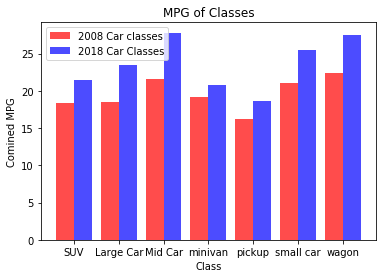

In [13]:
classes08 = plt.bar(ind, proportions08, width, color='r', alpha=.7, label="2008 Car classes")
classes18 = plt.bar(ind+width, proportions18, width, color='b', alpha=.7, label='2018 Car Classes')
plt.ylabel("Comined MPG")
plt.xlabel("Class")
plt.title("MPG of Classes")
locations = ind + width /2
labels=['SUV','Large Car', 'Mid Car',"minivan",'pickup','small car','wagon']
plt.xticks(locations,labels)
plt.legend();

In [14]:
mpg_change = means['2018'] - means['2008']
mpg_change

veh_class
SUV              3.007487
large car        4.900000
midsize car      6.246780
minivan          1.682353
pickup           2.384863
small car        4.385721
station wagon    5.162745
Name: cmb_mpg, dtype: float64

### Q3: What are the characteristics of SmartWay vehicles? Have they changed over time?

In [15]:
smart = all_data.groupby(['year', 'smartway'])['greenhouse_gas_score','cmb_mpg']
smart.describe()

greenhouse_gas_score                                         \
                             count       mean       std   min   25%   50%   
year smartway                                                               
2008 no                      607.0   4.149918  1.629634   0.0   3.0   5.0   
     yes                     380.0   6.868421  0.827338   6.0   6.0   7.0   
2018 Elite                    17.0  10.000000  0.000000  10.0  10.0  10.0   
     No                      724.0   4.276243  1.256106   1.0   3.0   4.0   
     Yes                      91.0   7.538462  0.860332   7.0   7.0   7.0   

                          cmb_mpg                                          \
                75%   max   count       mean        std   min   25%   50%   
year smartway                                                               
2008 no         5.0   7.0   607.0  17.316310   2.766868  10.0  15.0  18.0   
     yes        7.0  10.0   380.0  23.736842   3.060379  20.0  22.0  23.0   
2018 Elite     10.0  10.0    17.0  53.000000  24.065016  26.0  29.0  46.0   
     No         5.0  10.0   724.0  22.041436   4.424682  10.0  19.0  22.0   
     Yes        8.0  10.0    91.0  34.439560  10.214596  27.0  31.0  32.0   

                            
                75%    max  
year smartway               
2008 no        19.0   23.0  
     yes       25.0   46.0  
2018 Elite     67.0  106.0  
     No        25.0   60.0  
     Yes       34.0  106.0

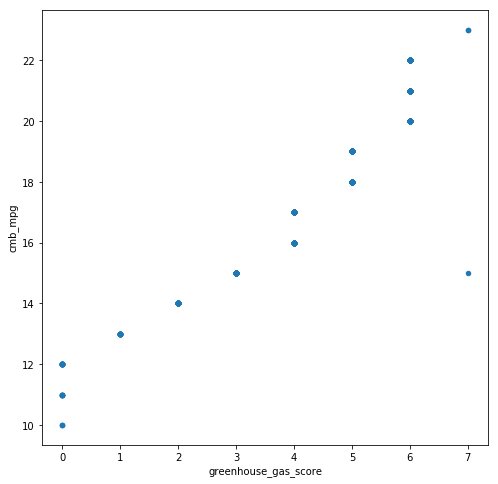

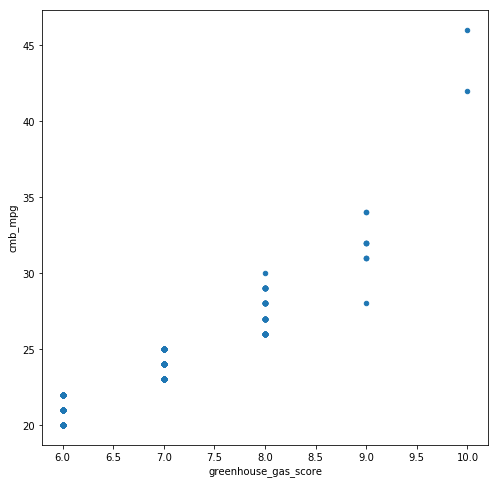

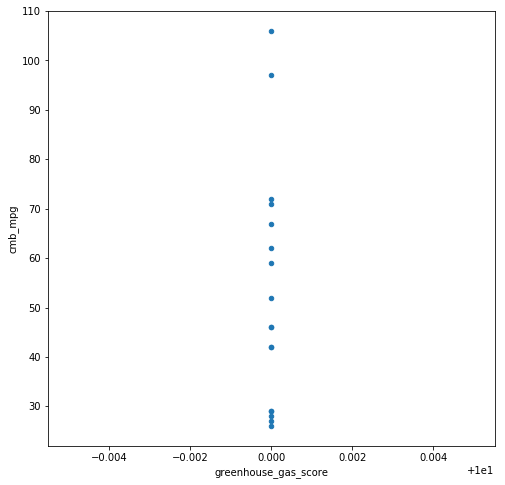

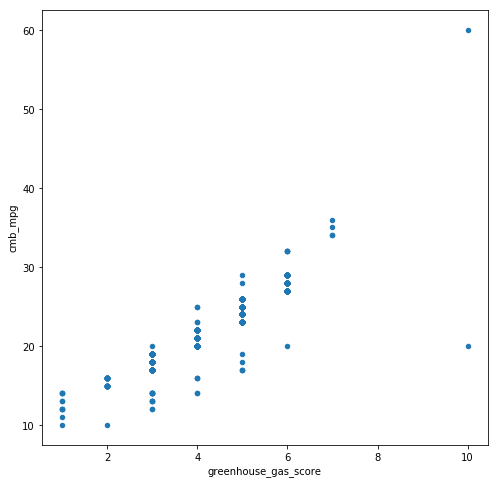

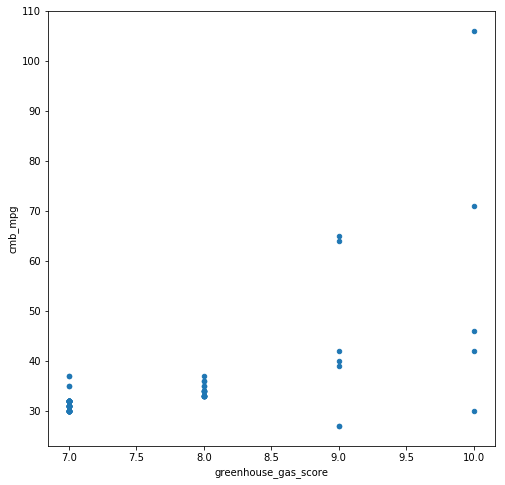

In [16]:
smart.plot(kind='scatter',x="greenhouse_gas_score", y="cmb_mpg", figsize=(8,8));

### Q4: What features are associated with better fuel economy?

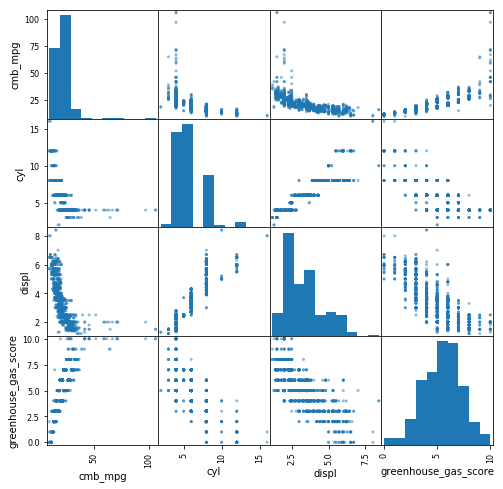

In [29]:
fuel= all_data
pd.plotting.scatter_matrix(fuel[['cmb_mpg','cyl','displ','greenhouse_gas_score']],figsize=(8,8));